In [1]:
#import pandas library
import pandas as pd

#loading dataset
df=pd.read_csv("/content/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
#target variable
y=df.Outcome
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [4]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

#Evaluation using Accuracy score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 71.42857142857143


In [5]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[78, 21],
       [23, 32]])

In [6]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
# Visualizing Decision trees
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("The classification rate increased to 79.87%, which is better accuracy than the previous model.")

Accuracy: 79.87012987012987
The classification rate increased to 79.87%, which is better accuracy than the previous model.


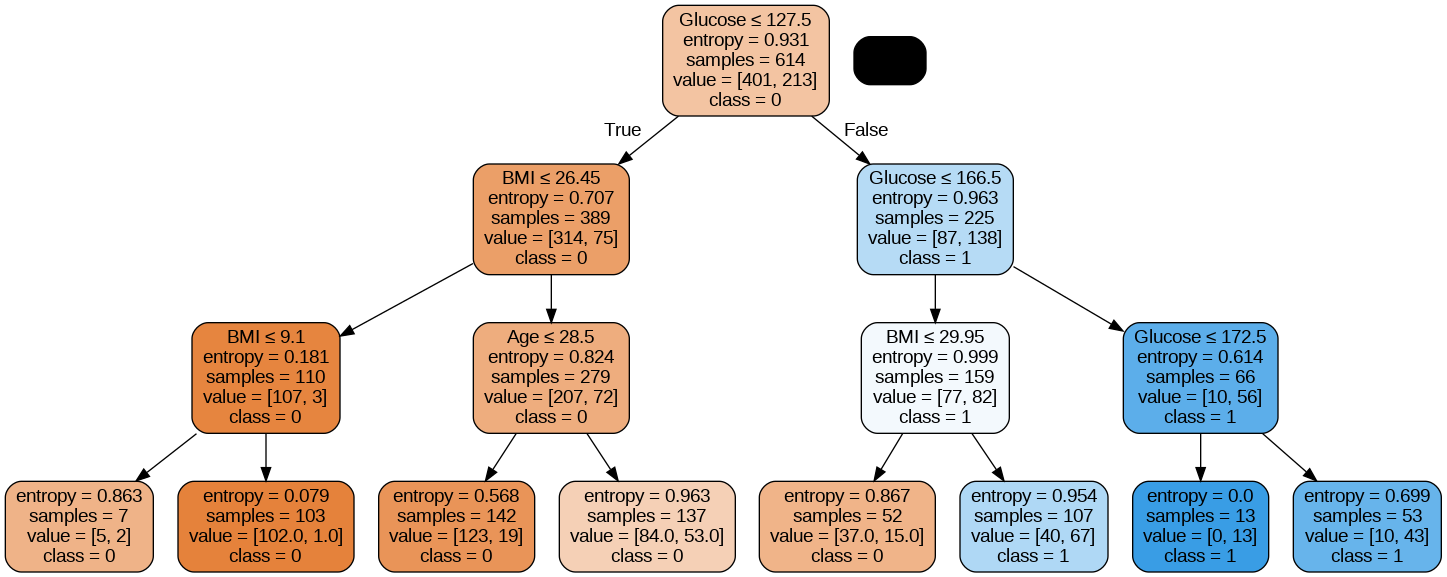

In [11]:
#Better Decision Tree Visualisationfeatures
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

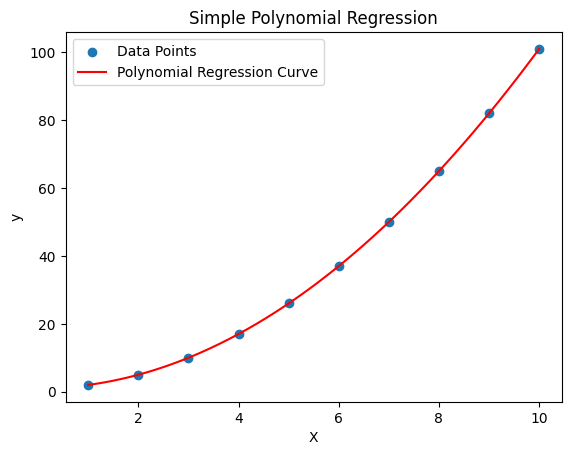

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 5, 10, 17, 26, 37, 50, 65, 82, 101])

# Fit a 2nd-degree polynomial
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)

# Generate points for the curve
X_plot = np.linspace(min(x), max(x), 100)
y_plot = polynomial(X_plot)

# Create the plot
plt.scatter(x, y, label="Data Points")
plt.plot(X_plot, y_plot, color='red', label="Polynomial Regression Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Polynomial Regression")
plt.legend()
plt.show()